**<h1>Tarea2: Movimiento de un sólido</h1>**
<h2>Movimiento relativo de un cuerpo en la superficie de la Tierra</h2>

**Integrantes:**
1. Jerónimo López Gómez C.C. 1001.735.3334
2. Valentina Lobo Ruiz C.C. 1067912559

**<h2>Planteamiento del Problema</h2>**
Desde la física se ha planteado la existencia de 4 fuerzas fundamentales en nuestro universo. Estás son la fuerza gravitacional, la fuerza electromágnetica, la fuerza fuerte y la fuerza débil. Sin embargo, cuando se analiza el movimiento de un cuerpo sólido desde un sistema de referencia no inercial se pueden apreciar unas fuerzas ficticias debidas a la inercia: **Fuerza centrifuga** y **Efecto Coriolis**. En el presente trabajo exploraremos las ecuaciones que describen el movimiento relativo de un cuerpo sobre la superficie de la Tierra la superficie de la Tierra.

**<h2>Marco Teórico</h2>**

Los efectos debidos a la rotación terrestre son fenómenos que aunque sean imperceptible a nuestros sentidos, se encuentra presente debido a la leve velocidad angular de rotación terrestre, que se encuentra por el orden de $\Omega = 7.29 \cdot 10^{-5}$**[rad/s]**. La fuerza de Coriolis y la ficticia fuerza centrifuga, son experimentadas por todos los cuerpos en la superficie terrestre, efectos que logramos evidenciar en ejemplos concretos como la variación del plano de oscilación en un pendulo de Foucault, la rotación de los vórtices de tormentas tropicales como el sentido del giro del agua en el inodoro. Es de agregar tambien que debemos experimentar efectos denbidos a la traslación terrestre respecto al Sol, pero estos serán despreciados en el presente estudio ya que solo se enfocará el movimiento rotacional de nuestro planeta.

De acuerdo a la teoría, el movimiento que describe un cuerpo respecto a un sistema de referencia no inercial, como es en este caso el planeta tierra debido a su rotación que se asume completamente uniforme, debe tener presentes las contribuciones de 2 fuerzas, la debida al efecto de Coriolis y la Fuerza centrifuga, lo cuál se expresa de acuerdo a la teoría **[CITA LANDAU]** en el siguiente modelo diferencial descartando otras contribuciones que no serán objeto de estudio:

$$m\frac{d^{2}\vec{r} }{\mathrm{d} t^2} = -\frac{\partial U }{\partial \vec{r}} + 2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega }  +m\vec{\Omega }\times(\vec{\Omega } \times \vec{r}) \ (1)$$  


Donde $2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega}$ es la fuerza de Coriolis y $m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$ la fuerza centrifuga experimentada por el cuerpo, además se considerarán las variaciones de la aceleración gravitacional con la altura, en este caso asumiendo la tierra como una esfera homogénea por lo que $g = \frac{r}{R_T}g_0$. Finalmente la dinámica de un cuerpo en la tierra se expresa como se sigue, en función de $\vec{r}_{(x,y,z)}$:

$$m \ddot x = -m{g_0}\frac{x}{R_T} + 2m\dot y \Omega_z - m\Omega_z^2 x$$
$$m \ddot y= -m{g_0}\frac{y}{R_T} - 2m\dot x \Omega_z - m\Omega_z^2 y$$
$$m \ddot z = -m{g_0}\frac{z}{R_T} + m\Omega_z^2 |\vec{r}|\cos{\theta} - m\Omega_z^2 z = -m{g_0}\frac{z}{R_T}$$

nota: Aplicando $A \times (B \times C) = (A \cdot C)B - (A \cdot B)C$ y teniendo en cuenta que $|\vec{r}|\cos \theta = z$

Realizando la tranasformación de coordenadas de la anterior expresión a coordenadas esféricas, podemos expresar el movimiento de un cuerpo en función de 2 ángulos ($\theta$, $\phi$) polar y azimutal correspondientemente, que pueden describir la pocisión de un cuerpo respecto al centro terrestre. Se aplica la siguiente regla de transformación ampliamente ya conocida:

$$ x = r \sin{\theta}\cos{\phi} \rightarrow \dot x \rightarrow \ddot x$$
$$ y = r \sin{\theta}\sin{\phi} \rightarrow \dot y \rightarrow \ddot y$$
$$ z = r \cos{\theta} \rightarrow \dot z \rightarrow \ddot z$$



In [2]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sp
from sympy import init_printing
init_printing() 

R_T, t, m, g0, Omz, F, r = sp.symbols('R_T, t, m, g_0, Omega_z, F, r')

theta_ang, phi_ang = sp.Function('theta')(t), sp.Function('phi')(t)
#ddot_theta, ddot_phi = sp.diff(theta_ang,t,2), sp.diff(phi_ang,t,2)
x,y,z = sp.Function('x')(t), sp.Function('y')(t), sp.Function('z')(t)

#Componentes Cartesianas ecuación de movimiento
eqx = sp.Eq(sp.diff(x,t,2), (F-g0)*x/R_T + 2*sp.diff(y,t)*Omz + Omz**2*x)                                  
eqy = sp.Eq(sp.diff(y,t,2), (F-g0)*y/R_T - 2*sp.diff(x,t)*Omz + Omz**2*y)
eqz = sp.Eq(sp.diff(z,t,2), (F-g0)*z/R_T)

#Relaciones de Transformación
X, Y, Z = r*sp.sin(theta_ang)*sp.cos(phi_ang),  r*sp.sin(theta_ang)*sp.sin(phi_ang),  r*sp.cos(theta_ang)

sol_C = sp.solve([eqx,eqy,eqz], [x,y,z])   #Solución Cartesiana del movimiento

#Aplicando la transformación de coordenadas XT, YT, ZT

sol_XT = sp.Eq(X, sol_C[x].subs({sp.diff(x,t,2):sp.diff(X,t,2), sp.diff(y,t):sp.diff(Y,t)}))

sol_YT = sp.Eq(Y, sol_C[y].subs({sp.diff(x,t):sp.diff(X,t),sp.diff(y,t,2):sp.diff(Y,t, 2) }))

sol_ZT = sp.Eq(Z, sol_C[z].subs({sp.diff(z,t,2):sp.diff(Z,t,2)}))

#Despejamos F  de sol_ZT y la reemplazamos en sol_XT, sol_YT

F_replace = sp.solve(sol_ZT, F)[0]

sol_XT = sp.Eq(X, sol_XT.rhs.subs({F:F_replace}))
sol_YT = sp.Eq(Y, sol_YT.rhs.subs({F:F_replace}))

#Despejamos para las aceleraciones angulares theta, phi respectivamente

solution = sp.nonlinsolve([sol_XT.rhs-X, sol_YT.rhs-Y], [sp.diff(theta_ang,t,2), sp.diff(phi_ang, t,2)])

Por medio de métodos de la libreria `sympy` realizamos la transformación de coordenadas y solución algebraica del problema y explicitar las aceleraciones a las que esta sometida una particula respecto al marco de referencia no inercial en coordenadas esfericas, las cuáles se presentan a continuación:

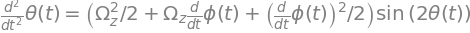

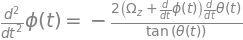

In [3]:
display(sp.Eq(sp.diff(theta_ang,t,2), solution.args[0][0].simplify()),
sp.Eq(sp.diff(phi_ang,t,2), solution.args[0][1].simplify()))

Se procede a continuación con la resolución numérica de la trayectoria del cuerpo, planteando los anteriores resultados en el modelo diferencial `body_motion()` el cuál se incorpora dentro de la función `non_inertial_mot()` que tiene como argumentos las condiciones iniciales del movimiento y valores de las constantes involucradas, y se proyecta la trayectoria sobre una esfera de radio $R_T$ simulando una tierra perfectamente esferica sin considerar las variaciones reales del planeta ni las anomalias gravitacionales.

In [4]:
#Modelo diferencial de la dinámica del sólido respecto a la tierra como sistema no inercial
def body_motion(var, t, omegaT):
    theta, theta2, phi, phi2 = var
    dtheta_dt, dphi_dt = theta2, phi2

    dtheta2_dt = np.sin(theta) * np.cos(theta) * ((phi2)**2 + 2*omegaT*phi2 + omegaT**2)
    dphi2_dt = -2*np.cos(theta)/np.sin(theta) * (omegaT*theta2 + theta2*phi2)

    return [dtheta_dt, dtheta2_dt, dphi_dt, dphi2_dt]


#Función Conjunta    

def non_inertial_mot(init_params, t_samples, t_final, RT = 6378137.0, omegaT = 7.29211e-5, coords=False):

    """
    Soluciona la trayectoria de un cuerpo respecto al sistema no inercial (Tierra), entregando las coordenadas
    correspondientes

    init_params : [theta_0[rad], veltheta_0[rad/s], phi_0[rad], velphi_0[rad/s]]
    t_samples   : Muestreo temporal
    t_final     : duración del invervalo temporal [s] para el desarrollo del movimiento
    RT          : Radio Terrestre [m] (Defecto:6378137.0)
    omegaT      : Velocidad angular constante de la tierra [rad/s] (defecto: 7.29211e-5)
    coords      : (Defecto: False) Si coords=True, retorna coords

    return: coordenadas = {time, theta, veltheta, phi, velphi, X, Y, Z}
    """

    #Intervalo temporal en el que transcurre el movimiento

    t = np.linspace(0, t_final, t_samples)
    
    solve = odeint(body_motion, init_params, t, args=(omegaT,))    #Soluciones numericas por scipy.integrate.odeint
    theta_s, veltheta_s = solve[:,0], solve[:,1]
    phi_s, velphi_s = solve[:,2], solve[:,3]

    #Coordenadas Cartesianas del Movimiento

    XT = RT * np.sin(theta_s) * np.cos(phi_s)
    YT = RT * np.sin(theta_s) * np.sin(phi_s)
    ZT = RT * np.cos(theta_s)

    coordenadas = {
        "t"         : t,
        "theta"     : theta_s,
        "vel_theta" : veltheta_s,
        "phi"       : phi_s,
        "vel_phi"   : velphi_s,
        "X"         : XT,
        "Y"         : YT,
        "Z"         : ZT
    }

    #Graficación

    #Esfera Terrestre
    PHI = np.linspace(0, np.pi, 30)
    THETA = np.linspace(0, 2 * np.pi, 40)
    PHI, THETA = np.meshgrid(PHI, THETA)
    x_sphere = RT * np.sin(PHI) * np.cos(THETA)
    y_sphere = RT * np.sin(PHI) * np.sin(THETA)
    z_sphere = RT * np.cos(PHI)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_sphere, y_sphere, z_sphere, cmap='viridis', alpha=0.2, zorder=2, label = 'Tierra')
    ax.plot_surface(x_sphere, y_sphere, z_sphere*0, color='b', alpha=0.1, zorder=1, label = 'Plano Ecuatorial')
    ax.plot(x_sphere*0, y_sphere*0, z_sphere*2, color='black', alpha=0.5, label='Z_axis')

    #Trayectoria
    ax.plot(XT, YT, ZT, color='r', linewidth=1.5, zorder=5, label='trayectoria', linestyle='--')
    ax.set_xlabel('x (km)')
    ax.set_ylabel('y (km)')
    ax.set_zlabel('z (km)')
    ax.set_xlim(-RT,RT), ax.set_ylim(-RT,RT), ax.set_zlim(-RT,RT)
    ax.set_title('Movimiento sobre la superficie de la Tierra')
    plt.legend()

    plt.show()

    if coords: return coordenadas 

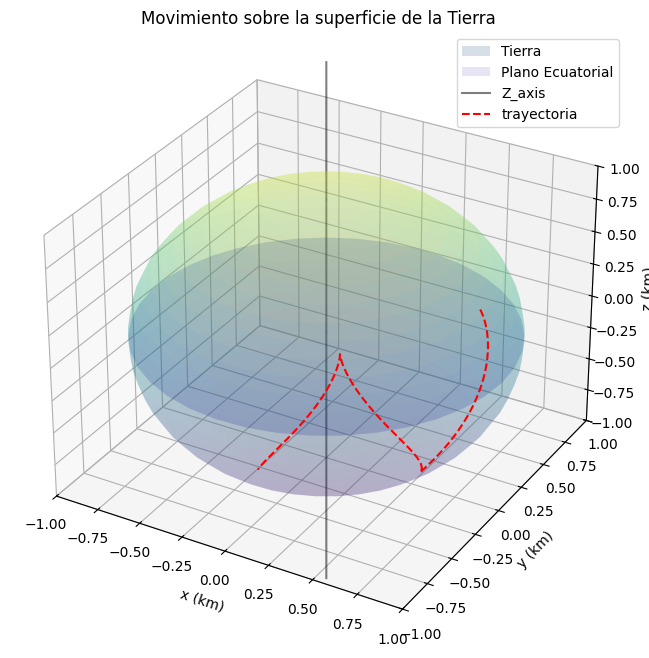

In [5]:
init_params = [np.pi/3, 0, 0, 0]
a = non_inertial_mot(init_params, 1000, 10, RT= 1, omegaT=1,  coords=True)

La fuerza centripeta que se ejerce en una particula, a causa de la rotación terrestre, está equilibrada con la fuerza gravitacional que ejerce el Sol hacia la Tierra. Es este equilibrio el que permite que nuestro planeta se mantenga orbitando alrededor del Sol. 

Por otro lado, la fuerza de coriolis, como se puede apreciar de la ecuación (1) es perpendicular a la velocidad angular del sistema no inercial $\vec{\omega}$ y a la velocidad de la particula $\vec{v}$. En el hemiferio norte, donde $\vec{\omega}$  es positivo, la fuerza de coriolis tiende a desviar a un proyectil disparado hacia la derecha de su dirección de movimiento. Mientras que en el hemisferio sur se desvía hacia el sentido opuesto y en el ecuador el desvío es nulo **[Cita Goldstein]**.Fisicamente, un proyectil que es disparado desde cualquier Polo terrestre no tendrá un movimiento rotacional inicial, su desviación aparante se debe a la Tierra que gira debajo de él. Este movimiento relativo se da respecto a las estrellas fijas con una velocidad angular relativa de:

$$ \omega = (\frac{2 \pi}{24 \times 2600}) (\frac{366,5}{365, 5}) = 7.292 \times 10^{-5} s^{-1}$$

Donde el primer paréntesis hace referencia a la velocidad angular del movimiento alrededor del Sol; mientras que, el segundo es la razón entre el númer de días solares y días sidarales, este cociente nos da un factor de corrección respecto a la velocidad relativa de las estrellas fijas. 



Usando nuestro modelo númerico veamos este fenómeno:

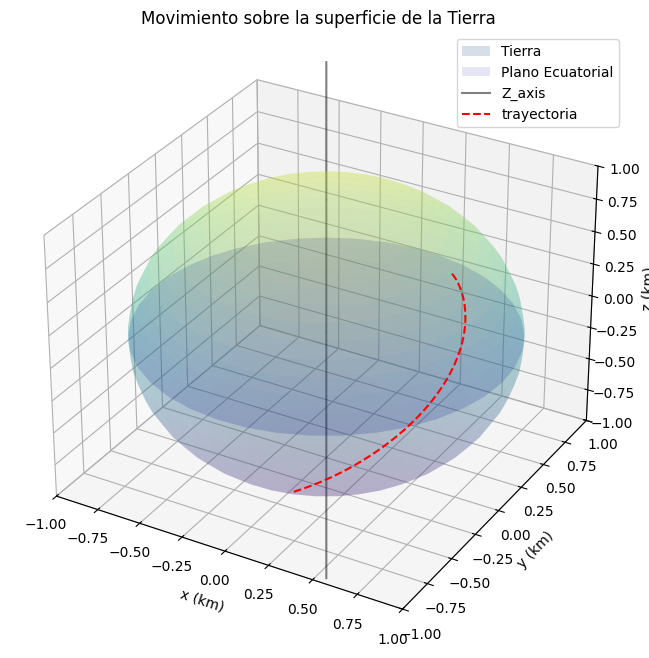

In [6]:
#Movimiento hacia el hemisferio sur
init_params = [np.pi/4, 0, 0, 0]
a = non_inertial_mot(init_params, 1000, 4, RT= 1, omegaT=1,  coords=True)

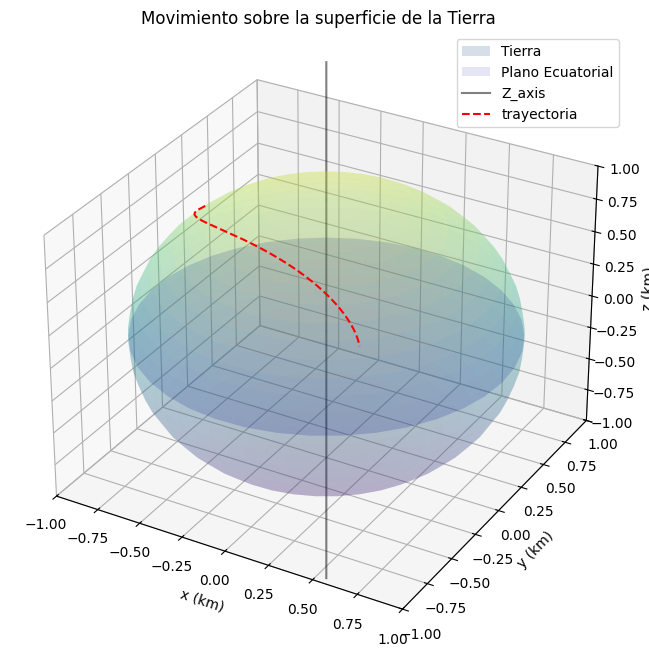

In [7]:
#Movimiento hacia el hemisferio norte
init_params = [-np.pi/4, 0, 0, 0]
b = non_inertial_mot(init_params, 1000, 4, RT= 1, omegaT=1,  coords=True)

Para observarlo a mayor detalle, comparemos ahora las trayectorias en el plano comformado por los ángulos $\phi$ y $\theta$.

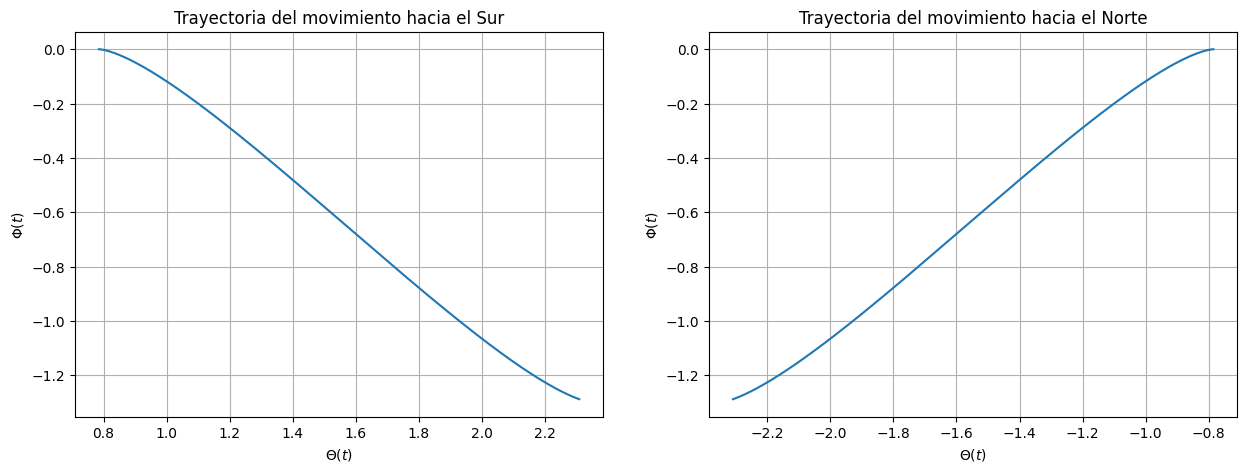

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(a['theta'], a['phi'])
plt.xlabel(r"$ \Theta (t)$")
plt.ylabel(r"$\Phi (t)$")
plt.title("Trayectoria del movimiento hacia el Sur")
plt.grid()

plt.subplot(1,2, 2)
plt.plot(b['theta'], b['phi'])
plt.xlabel(r"$ \Theta (t)$")
plt.ylabel(r"$\Phi (t)$")
plt.title("Trayectoria del movimiento hacia el Norte")
plt.grid()

In [9]:
from IPython.display import Image
Fig1 = Image('Fig1.jpeg')
Fig2 = Image('Fig2.jpeg')

El efecto de Coriolis tiene un papel importante algunos fenómenos prsentes en nuestro medio ambiente, especialmente, de tipo meteorológicos; ejemplos de estos son: **la circulación de los vientos alisios** y **la corriente del Golfo**. Revisando de forma simplificada, el problema de la circulación de vientos horizontales a gran escala, vemos que las masas de aire se mueven de regiones con presión elevada a las zonas de menor presión. En codiciones ideales (sin presencia de Coriolis), las direcciones del viento serían perpendiculares a las zonas isobaras. No obstante, por la fuerza de Coriolis, los vientos se siguen desviando, como se observa en la Figura 1. En este modelo ideal, la desviación sigue hasta que el movimiento del viento sea paralelo a las zonas isobaras y la fuerza de Coriolis tenga una dirección contraria a la fuerza del gradiente de presiones y se equilibre.

![](Fig2.jpeg)

En el anterior modelo simplificado no se tienen en cuenta los efectos del rozamiento de la viscosidad turbulenta y más fenómenos de la Hidrodinámica, con lo cual, en un caso real, la dirección del movimiento del viento nunca resulta paralelo como se observa en la Figura 2.

![](Fig1.jpeg)


## **Caída libre y movimiento párabolico con la corrección de la fuerza coriolis**

En la sección anterior se exploró a nivel general los efectos que tienen la fuerza de coriolis y la fuerza centrifuga que se presentan en los lazamiento de proyectiles o en lac corrientes de aire. Ahora, se procede a analizar el caso de un cuerpo que está cayendo desde una altura h hacia la superficie terrestre, y cómo es el comportamiento de su trayectoria hasta que impacta en la superficie.

Para ello, se aboradará este problema de dos formas:

1. Veremos la solución analitica inspirada en el ejercicio **39.1** del libro **Mecánica clásica de Landau**
2. Se comparará la anterior solución con una obtenida de forma númerica usando el método **Odeint** de la libreria scipy.

 Consideremos entonces que el campo gravitario es de $U = -m \textbf{gr}$. Al despeciar la fuerza centrifuga, nos queda una ecuación de movimiento como la siguiente

$$ \dot{\vec{v}} = 2\vec{v} \times \vec{\Omega} + \vec{g} $$

Siguiendo la solución por el método de aproximaciones sucesivas planteado en el libro de Landau se obtiene:
$$ \vec{v} = 2t \vec{g} \times \vec{\Omega} + 2\vec{v_o} \times \vec{\Omega} $$ 
Siendo $\vec{v_o}$ la velocidad inical. Integrando lo anterior se tiene entonces

$$\vec{r} = \vec{h} + \vec{v_o} t + \frac{1}{2} \vec{g} t^2 +  \frac{1}{3}  t^3  \vec{g} \times \vec{\Omega} + t^2  \vec{v_o} \times \vec{\Omega} $$

Seguiremos la misma conveción del libro del Landau, es decir, se trabajará en coordenadas cartesianas de manera que se toma el eje $z$ verticalmente hacia arriva y el eje x hacia el polo. Las expresiones para cada componente son:

$$x = x_o + v_{ox} t + \frac{1}{2} g_x t^2 + \frac{1}{3}  t^3 (g_y \Omega_z -g_z \Omega_y )+ t^2  (v_{oy} \Omega_z - v_{oz} \Omega_y)  $$

$$y = y_o + v_{oy} t + \frac{1}{2} g_y t^2 + \frac{1}{3}  t^3 (g_z \Omega_x -g_x \Omega_z )+ t^2  (v_{oz} \Omega_x - v_{ox} \Omega_z)  $$

$$z = z_o + v_{oz} t + \frac{1}{2} g_z t^2 + \frac{1}{3}  t^3 (g_x \Omega_y -g_y \Omega_x )+ t^2  (v_{ox} \Omega_y - v_{oy} \Omega_x)  $$

Veamos gráficamente este fenómeno:



In [34]:
def caida_libre_analitic(t, h, vo, g, omega):
    """Esta función calculará la trayectoria de un cuerpo que cae libremente teniendo en cuenta
    los efectos de la fuerza de coriolis en la trayectoria
    h: posición inicial
    vo: velocidad inicial
    g: aceleración gravitacional
    Omega: Velocidad angular de la Tierra
    """
    xo, yo, zo = h
    vox, voy, voz = vo
    gx, gy, gz = g
    omgx, omgy, omgz = omega

    x = xo + vox * t  + 0.5 * gx * (t**2) + (1/3) *t**3 *(gy*omgz-gz*omgy )+ (t**2) * (voy *omgz - omgy*voz)
    y = yo + voy * t + 0.5 * gy * (t**2) + (1/3) *t**3 *(gz*omgx-gx*omgz )+ (t**2) * (voz *omgx - omgz*vox)
    z = zo + voz * t + 0.5 * gz * (t**2) + (1/3) *t**3 *(gx*omgy-gy*omgx )+ (t**2) * (vox *omgy - omgx*voy)

    return x,y, z


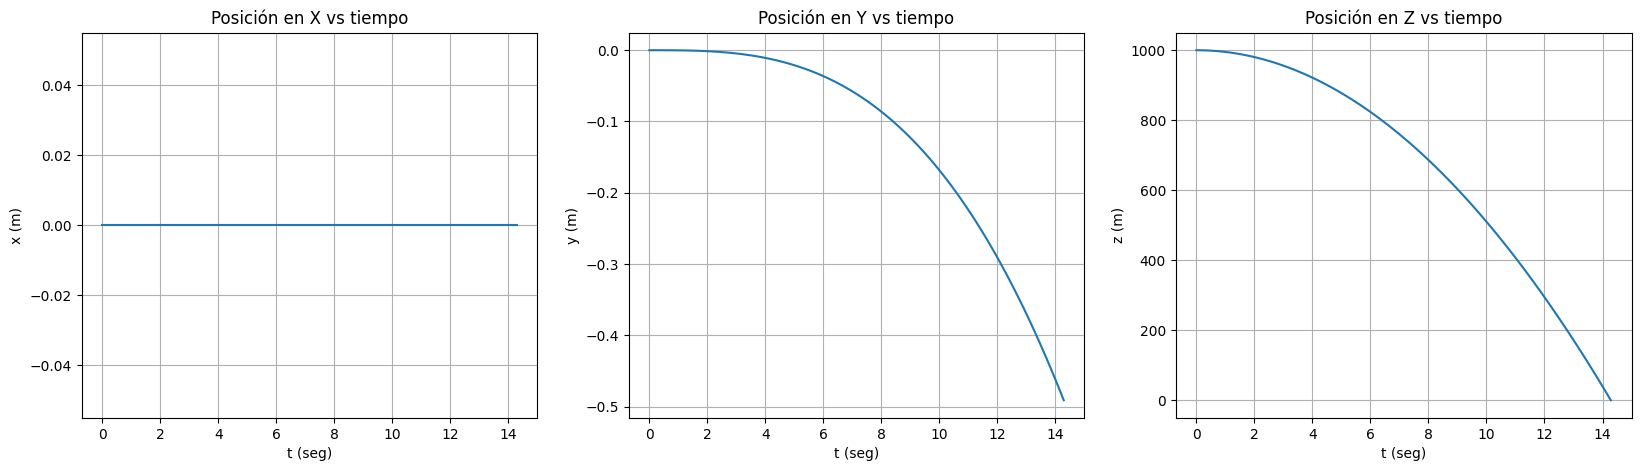

In [39]:
# Gráfiquemos el movimiento con las siguientes condiciones iniciales

h = (0,0, 1000)
vo = (0,0,0)
g = (0, 0, -9.8)
theta = np.pi/4 #Latitud
omgT = 7.29211e-5
omega = (omgT*np.cos(theta), 0, omgT*np.sin(theta))
tfinal = np.sqrt( 2* h[2]/9.8)
t = np.linspace(0, tfinal, 100)
RT = 8137.0
X, Y, Z = caida_libre_analitic(t, h, vo, g, omega)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(t, X)
plt.title("Posición en X vs tiempo")
plt.ylabel('x (m)')
plt.xlabel('t (seg)')
plt.grid()

plt.subplot(1,3,2)
plt.plot(t, Y)
plt.title("Posición en Y vs tiempo")
plt.ylabel('y (m)')
plt.xlabel('t (seg)')
plt.grid()

plt.subplot(1,3,3)
plt.plot(t, Z)
plt.title("Posición en Z vs tiempo")
plt.ylabel('z (m)')
plt.xlabel('t (seg)')
plt.grid()



Veamos como se ve la trayectoria de este cuerpo en un espacio tridimensional.

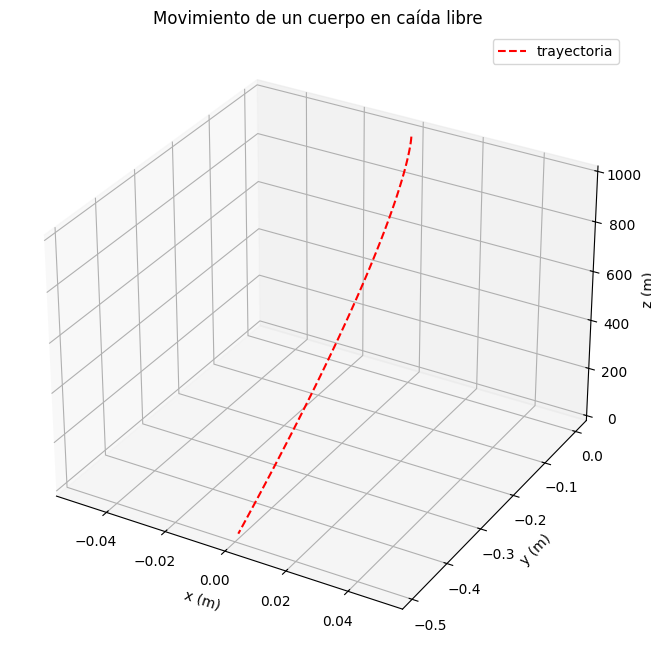

In [36]:
#GRAFICA

PHI = np.linspace(0, np.pi, 30)
THETA = np.linspace(0, 2 * np.pi, 40)
PHI, THETA = np.meshgrid(PHI, THETA)
x_sphere = RT * np.sin(PHI) * np.cos(THETA)
y_sphere = RT * np.sin(PHI) * np.sin(THETA)
z_sphere = RT * np.cos(PHI)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

#Trayectoria
ax.plot(X, Y, Z, color='r', linewidth=1.5, zorder=5, label='trayectoria', linestyle='--')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('z (m)')
ax.set_title('Movimiento de un cuerpo en caída libre')
plt.legend()

plt.show()

Se puede observar como gracias a la fuerza de coriolis, la caída libre de un cuerpo no es una línea recta como en su aproximación usual; si no que se presenta una curvatura hacia el este y oeste dependiendo de la latitud en la que se presenta. No obstante, esta corrección se aprecia solo a nivel local, en la siguiente gráfica se puede apreciar como se percibe desde afuera de la Tierra.

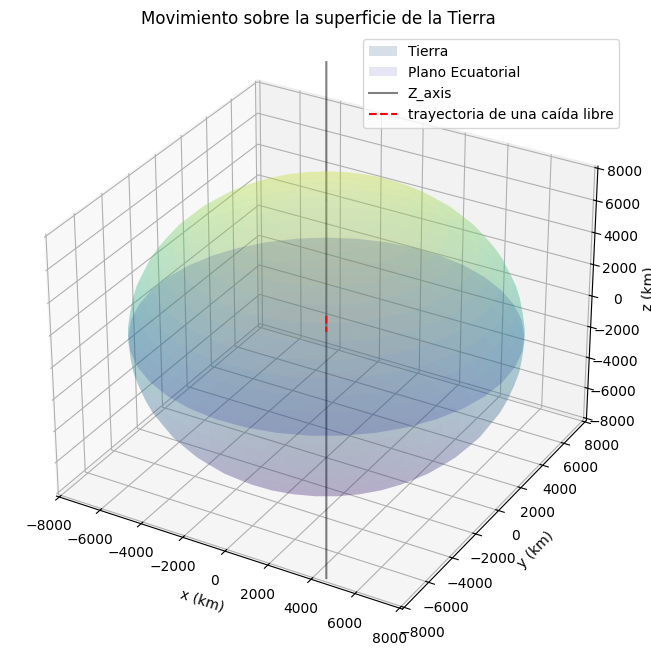

In [37]:
#GRAFICA

PHI = np.linspace(0, np.pi, 30)
THETA = np.linspace(0, 2 * np.pi, 40)
PHI, THETA = np.meshgrid(PHI, THETA)
x_sphere = RT * np.sin(PHI) * np.cos(THETA)
y_sphere = RT * np.sin(PHI) * np.sin(THETA)
z_sphere = RT * np.cos(PHI)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, cmap='viridis', alpha=0.2, zorder=2, label = 'Tierra')
ax.plot_surface(x_sphere, y_sphere, z_sphere*0, color='b', alpha=0.1, zorder=1, label = 'Plano Ecuatorial')
ax.plot(x_sphere*0, y_sphere*0, z_sphere*2, color='black', alpha=0.5, label='Z_axis')

#Trayectoria
ax.plot(X, Y, Z, color='r', linewidth=1.5, zorder=5, label='trayectoria de una caída libre', linestyle='--')
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_zlabel('z (km)')
ax.set_xlim(-RT,RT), ax.set_ylim(-RT,RT), ax.set_zlim(-RT,RT)
ax.set_title('Movimiento sobre la superficie de la Tierra')
plt.legend()

plt.show()

Podemos observar como desde estas escalas de magnitud se observa como un movimiento en línea recta, es por esto, que la aproximación que se realiza usualemente para la movimiento de caída libre de un cuerpo sigue siendo válido y adecuado. Veamos ahora la solución númerica para el mismo problema. Para ello veamos la ecuación diferencial del problema:

$$ \dot{\vec{v}} = 2\vec{v} \times \vec{\Omega} + \vec{g} $$

Ahora expadamos la anterior ecuación vectorial en las componentes que la conforman:

$$ \dot{v_x} = 2(v_y \Omega_z - v_z \Omega_y) + g_x$$
$$ \dot{v_y} = 2(v_z \Omega_x - v_x \Omega_z) + g_y$$
$$ \dot{v_z} = 2(v_x \Omega_y - v_y \Omega_x) + g_z$$


In [41]:
def caida_libre_num(vars, t, omega, g):
    x, y, z, vx, vy, vz = vars
    omgx, omgy, omgz = omega
    gx, gy, gz = g

    dxdt = vx
    dydt = vy
    dzdt = vz
    
    dvxdt = 2*(dydt * omgz - dzdt*omgy) + gx
    dvydt = 2*(dzdt * omgx - dxdt*omgz) + gy
    dvzdt = 2*(dxdt * omgy - dydt*omgx) + gz

    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

omega = [omgT*np.cos(theta), 0, omgT*np.sin(theta)]
tfinal = np.sqrt( 2* h[2]/9.8)
t = np.linspace(0, tfinal, 100)
g = [0, 0, -9.8]
init_variables = [0,0, 1000, 0, 0, 0]

solucion = odeint(caida_libre_num,  init_variables, t, (omega, g))
x = solucion[:, 0]
y = solucion[:, 1]
z = solucion[:, 2]
vx = solucion[:, 3]
vy = solucion[:, 4]
vz = solucion[:, 5]

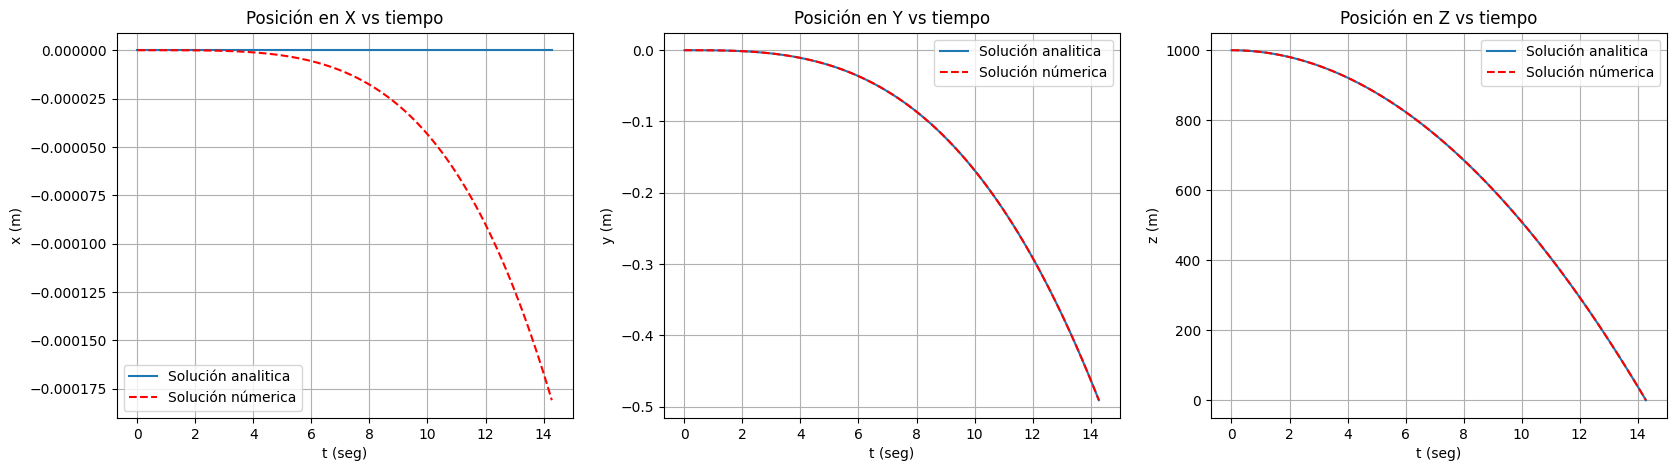

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(t, X,label ="Solución analitica" )
plt.plot(t, x, color = "red", linestyle = "--",  label ="Solución númerica")
plt.title("Posición en X vs tiempo")
plt.ylabel('x (m)')
plt.xlabel('t (seg)')
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.plot(t, Y,  label ="Solución analitica")
plt.title("Posición en Y vs tiempo")
plt.plot(t, y, color = "red", linestyle = "--", label ="Solución númerica")
plt.ylabel('y (m)')
plt.xlabel('t (seg)')
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.plot(t, Z,  label ="Solución analitica")
plt.plot(t, z, color = "red", linestyle = "--",  label ="Solución númerica")
plt.title("Posición en Z vs tiempo")
plt.ylabel('z (m)')
plt.xlabel('t (seg)')
plt.legend()
plt.grid()

Podemos observar que en las coordenadas $y$ y $z$ ambos métodos describen el movimiento de forma correcta. Sin embargo, se observa diferencias en la solución para la coordenada $x$, esta diferencia se debe mayormente a que aquello que nombramos como solución analitica no lo es exactamente. Para resolver la ecuación diferencial se recurre al método de aproximaciones sucesivas con dos iteraciones, por lo cual, no deja de ser una **solución aproximada**. También se puede observar como el movimiento en la coordenada $x$ es del orden de $10^{-4}$.


- TIRO PARABOLICO?

Determinar las modificaciones gravitacionales gracias al Efecto Eotvos.

## **Conclusiones**

**<h2>Referencias</h2>**

[1] Antoni Amengual; Noninertial trajectories on a fast rotating planet. Am. J. Phys. 1 December 2000; 68 (12): 1106–1108. https://doi.org/10.1119/1.1286860

[2] Landau, Lev Davidovich, and Evgeniĭ Mikhaĭlovich Lifshitz. Course of theoretical physics. Elsevier, 2013.

VALENTINA